In [1]:
from Config import Config, plot_rewards, print_cfgs
from Env import env_agent_config, all_seed
from Utils import test, train, to_tensor, plot
from Agent import DoubleDQN
import d2l.torch as d2l
import torch

Hyperparameters:
        Name        	       Value        	        Type        
     algo_name      	     DoubleDQN      	   <class 'str'>    
      env_name      	    CartPole-v1     	   <class 'str'>    
        seed        	        1234        	   <class 'int'>    
     train_eps      	        260         	   <class 'int'>    
      test_eps      	         20         	   <class 'int'>    
     max_steps      	        200         	   <class 'int'>    
  eval_per_episode  	         10         	   <class 'int'>    
      eval_eps      	         10         	   <class 'int'>    
       gamma        	        0.99        	  <class 'float'>   
         lr         	      0.00085       	  <class 'float'>   
   epsilon_start    	        0.95        	  <class 'float'>   
    epsilon_end     	        0.05        	  <class 'float'>   
   epsilon_decay    	        500         	   <class 'int'>    
    buffer_size     	        1000        	   <class 'int'>    
     batch_size     	        128      

/home/wyq/anaconda3/lib/python3.9/site-packages/gym/core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


开始更新策略！
回合：10/260，奖励：20.00，评估奖励：9.90，最佳评估奖励：9.90，更新模型！ 0.65
回合：20/260，奖励：19.00，评估奖励：8.80，最佳评估奖励：9.90，0.48
回合：30/260，奖励：21.00，评估奖励：16.40，最佳评估奖励：16.40，更新模型！ 0.38
回合：40/260，奖励：10.00，评估奖励：9.60，最佳评估奖励：16.40，0.31
回合：50/260，奖励：10.00，评估奖励：11.30，最佳评估奖励：16.40，0.26
回合：60/260，奖励：12.00，评估奖励：12.20，最佳评估奖励：16.40，0.20
回合：70/260，奖励：9.00，评估奖励：9.50，最佳评估奖励：16.40，0.17
回合：80/260，奖励：12.00，评估奖励：9.90，最佳评估奖励：16.40，0.14
回合：90/260，奖励：10.00，评估奖励：14.20，最佳评估奖励：16.40，0.12
回合：100/260，奖励：9.00，评估奖励：9.30，最佳评估奖励：16.40，0.11
回合：110/260，奖励：14.00，评估奖励：12.40，最佳评估奖励：16.40，0.10
回合：120/260，奖励：9.00，评估奖励：9.30，最佳评估奖励：16.40，0.08
回合：130/260，奖励：17.00，评估奖励：29.40，最佳评估奖励：29.40，更新模型！ 0.08
回合：140/260，奖励：12.00，评估奖励：8.90，最佳评估奖励：29.40，0.07
回合：150/260，奖励：26.00，评估奖励：29.20，最佳评估奖励：29.40，0.06
回合：160/260，奖励：10.00，评估奖励：10.10，最佳评估奖励：29.40，0.05
回合：170/260，奖励：145.00，评估奖励：10.20，最佳评估奖励：29.40，0.05
回合：180/260，奖励：95.00，评估奖励：180.60，最佳评估奖励：180.60，更新模型！ 0.05
回合：190/260，奖励：69.00，评估奖励：200.00，最佳评估奖励：200.00，更新模型！ 0.05
回合：200/260，奖励：126.00，评估奖励：190.50，最佳评估奖励：200.00，0

/home/wyq/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/wyq/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/wyq/Workspace/AttentionRL/StateAttentionDDQN/Config.py:45: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, len(rewards), 10)  # 设置x轴的范围


回合：2/20，奖励：200.00
回合：3/20，奖励：200.00
回合：4/20，奖励：200.00
回合：5/20，奖励：200.00
回合：6/20，奖励：200.00
回合：7/20，奖励：200.00
回合：8/20，奖励：200.00
回合：9/20，奖励：200.00
回合：10/20，奖励：200.00
回合：11/20，奖励：200.00
回合：12/20，奖励：200.00
回合：13/20，奖励：200.00
回合：14/20，奖励：200.00
回合：15/20，奖励：200.00
回合：16/20，奖励：200.00
回合：17/20，奖励：200.00
回合：18/20，奖励：200.00
回合：19/20，奖励：200.00
回合：20/20，奖励：200.00
完成测试


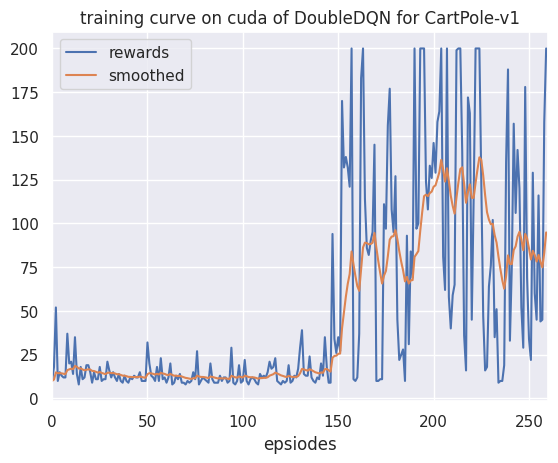

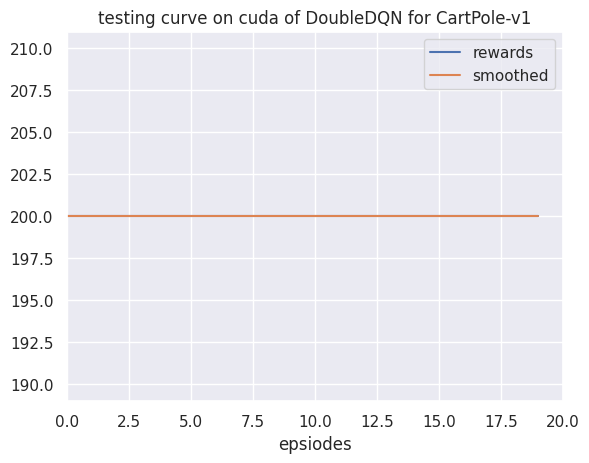

In [2]:
# 获取参数
cfg = Config() 
print_cfgs(cfg)
# 训练
env, agent = env_agent_config(cfg)
best_agent, res_dic = train(cfg, env, agent)
 
plot_rewards(res_dic['rewards'], title=f"training curve on {cfg.device} of {cfg.algo_name} for {cfg.env_name}")  
# 测试
res_dic = test(cfg, env, best_agent)
plot_rewards(res_dic['rewards'], title=f"testing curve on {cfg.device} of {cfg.algo_name} for {cfg.env_name}")

In [6]:
from IPython import display
import matplotlib.pyplot as plt
# cfg = Config() 
# env, agent = env_agent_config(cfg)
# draw_agent = agent
draw_agent = best_agent
draw_agent.policy_net.train()
NUM_OF_TEST = 1
test_total_reward = []
action_list = []
actions = []
state_list = []
atten_std = []
for i in range(NUM_OF_TEST):
    state = env.reset()
    total_reward = 0
    done = False

    # img = plt.imshow(env.render(mode='rgb_array'))
    while not done:
        action, q_value = draw_agent.predict_action_returnQ(state)
        actions.append(q_value)
        state, reward, done, _ = env.step(action)

        total_reward += reward
        # img.set_data(env.render(mode='rgb_array'))
        # display.display(plt.gcf())
        # display.clear_output(wait=True)

draw_agent.policy_net.train()
print("length of actions is ", len(actions))
for q_value in actions:
    print(q_value.cpu())

length of actions is  500
tensor([[172.7231, 173.9696]], grad_fn=<ToCopyBackward0>)
tensor([[172.2946, 172.3104]], grad_fn=<ToCopyBackward0>)
tensor([[169.9223, 168.3186]], grad_fn=<ToCopyBackward0>)
tensor([[172.4743, 170.2551]], grad_fn=<ToCopyBackward0>)
tensor([[173.0944, 172.3653]], grad_fn=<ToCopyBackward0>)
tensor([[172.0753, 173.5287]], grad_fn=<ToCopyBackward0>)
tensor([[173.1111, 174.0757]], grad_fn=<ToCopyBackward0>)
tensor([[172.7217, 172.4007]], grad_fn=<ToCopyBackward0>)
tensor([[172.9788, 172.4185]], grad_fn=<ToCopyBackward0>)
tensor([[171.8087, 173.4578]], grad_fn=<ToCopyBackward0>)
tensor([[172.9641, 174.0672]], grad_fn=<ToCopyBackward0>)
tensor([[172.7287, 172.5735]], grad_fn=<ToCopyBackward0>)
tensor([[172.8115, 172.4517]], grad_fn=<ToCopyBackward0>)
tensor([[171.7142, 174.7853]], grad_fn=<ToCopyBackward0>)
tensor([[172.4423, 172.4216]], grad_fn=<ToCopyBackward0>)
tensor([[170.9884, 174.5488]], grad_fn=<ToCopyBackward0>)
tensor([[172.1954, 173.9168]], grad_fn=<ToCopy

tensor([[[[0.0029, 0.0029, 0.0029, 0.0030, 0.1640, 0.0029, 0.0029, 0.0154]]]],
       grad_fn=<ToCopyBackward0>)

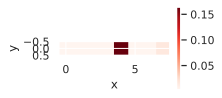

In [7]:
d2l.show_heatmaps(draw_agent.policy_net.atten.view(1, 1, 1, 8).cpu(), 'x', 'y')
draw_agent.policy_net.atten.view(1, 1, 1, 8).cpu()

In [5]:
torch.save(best_agent, 'Data/CartPole-v1_DDQN_Noise/01-260-200-200.pt')